In [240]:
import urllib2
import json
import random
import datetime

import math 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
from sklearn import svm, datasets 
%matplotlib inline
plt.style.use('ggplot')

In [2]:
urlQuery = "https://api.opendota.com/api/explorer?sql=SELECT%0A%0A--%20Basic%20table%0Amatches.match_id%2C%0Aplayer_matches.account_id%2C%0Ateams.team_id%2C%0Amatches.leagueid%2C%0Aleagues.name%20leaguename%2C%0Amatches.start_time%2C%0Aplayer_matches.hero_id%2C%0Aplayer_matches.player_slot%2C%0A((player_matches.player_slot%20%3C%20128)%20%3D%20matches.radiant_win)%20win%2C%0Aplayer_matches.deaths%2C%0Aplayer_matches.assists%2C%0Aplayer_matches.gold_per_min%20%2C%0Aplayer_matches.xp_per_min%20%2C%0Aplayer_matches.gold_spent%20%2C%0Aplayer_matches.hero_damage%20%2C%0Aplayer_matches.tower_damage%20%2C%0Aplayer_matches.stuns%20%2C%0Aplayer_matches.creeps_stacked%20%2C%0Aplayer_matches.camps_stacked%20%2C%0Aplayer_matches.hero_healing%20%2C%0Amatches.duration%2C%0Amatches.cluster%2C%0Amatches.first_blood_time%2C%0A%0A--timeStamp%20variables%0Aplayer_matches.gold_t%5B3%5D%20t_Gold_cnt_3%2C%0Aplayer_matches.gold_t%5B5%5D%20t_Gold_cnt_5%2C%0Aplayer_matches.gold_t%5B8%5D%20t_Gold_cnt_8%2C%0Aplayer_matches.gold_t%5B10%5D%20t_Gold_cnt_10%2C%0Aplayer_matches.gold_t%5B12%5D%20t_Gold_cnt_12%2C%0Aplayer_matches.gold_t%5B15%5D%20t_Gold_cnt_15%2C%0Aplayer_matches.gold_t%5B20%5D%20t_Gold_cnt_20%2C%0Aplayer_matches.gold_t%5B25%5D%20t_Gold_cnt_25%2C%0Aplayer_matches.gold_t%5B30%5D%20t_Gold_cnt_30%2C%0A%0Aplayer_matches.lh_t%5B3%5D%20t_LastHits_cnt_3%2C%0Aplayer_matches.lh_t%5B5%5D%20t_LastHits_cnt_5%2C%0Aplayer_matches.lh_t%5B8%5D%20t_LastHits_cnt_8%2C%0Aplayer_matches.lh_t%5B10%5D%20t_LastHits_cnt_10%2C%0Aplayer_matches.lh_t%5B12%5D%20t_LastHits_cnt_12%2C%0Aplayer_matches.lh_t%5B15%5D%20t_LastHits_cnt_15%2C%0Aplayer_matches.lh_t%5B20%5D%20t_LastHits_cnt_20%2C%0Aplayer_matches.lh_t%5B25%5D%20t_LastHits_cnt_25%2C%0Aplayer_matches.lh_t%5B30%5D%20t_LastHits_cnt_30%2C%0A%0Aplayer_matches.xp_t%5B3%5D%20t_Experience_cnt_3%2C%0Aplayer_matches.xp_t%5B5%5D%20t_Experience_cnt_5%2C%0Aplayer_matches.xp_t%5B8%5D%20t_Experience_cnt_8%2C%0Aplayer_matches.xp_t%5B10%5D%20t_Experience_cnt_10%2C%0Aplayer_matches.xp_t%5B12%5D%20t_Experience_cnt_12%2C%0Aplayer_matches.xp_t%5B15%5D%20t_Experience_cnt_15%2C%0Aplayer_matches.xp_t%5B20%5D%20t_Experience_cnt_20%2C%0Aplayer_matches.xp_t%5B25%5D%20t_Experience_cnt_25%2C%0Aplayer_matches.xp_t%5B30%5D%20t_Experience_cnt_30%2C%0A%0Aplayer_matches.pings%20ping_log%2C%0Aplayer_matches.obs_log%2C%0Aplayer_matches.sen_log%2C%0Aplayer_matches.runes_log%2C%0Aplayer_matches.kills_log%2C%0Aplayer_matches.buyback_log%2C%0A%0A--table_heroStats%0Aheroes.localized_name%2C%0Aheroes.attack_type%2C%0Aheroes.primary_attr%2C%0Aheroes.roles%20role_log%2C%0A%0A--purchase_log%0Aplayer_matches.purchase_log%0A%0A%0AFROM%20matches%0AJOIN%20match_patch%20using(match_id)%0AJOIN%20leagues%20using(leagueid)%0AJOIN%20player_matches%20using(match_id)%0ALEFT%20JOIN%20notable_players%20using(account_id)%0ALEFT%20JOIN%20teams%20using(team_id)%0AJOIN%20heroes%20ON%20player_matches.hero_id%20%3D%20heroes.id%0A%0A%0AWHERE%20TRUE%0AAND%20player_matches.account_id%20in%0A%20%20%20%20(%0A%20%20%20%20311360822%2C%0A%20%20%20%20205813150%2C%0A%20%20%20%20106573901%2C%0A%20%20%20%20111620041%2C%0A%20%20%20%20149486894%2C%0A%20%20%20%20105248644%2C%0A%20%20%20%2086700461%2C%0A%20%20%20%20116585378%2C%0A%20%20%20%20173880329%2C%0A%20%20%20%20106863163%2C%0A%20%20%20%20101586543%2C%0A%20%20%20%20108484186%2C%0A%20%20%20%20113457795%2C%0A%20%20%20%205150808%2C%0A%20%20%20%2012231202%2C%0A%20%20%20%2070388657%2C%0A%20%20%20%20250114507%2C%0A%20%20%20%2087586992%2C%0A%20%20%20%20154715080%2C%0A%20%20%20%2019757254%2C%0A%20%20%20%2086799300%2C%0A%20%20%20%2093119769%2C%0A%20%20%20%20107803494%0A%20%20%20%20)%0AAND%20matches.start_time%20%3E%3D%201483218000%0AORDER%20BY%20matches.match_id%20DESC%20NULLS%20LAST%0A--LIMIT%20200"

# Загружаем данные в формате json, парсим и сохраняем в Pandas

In [308]:
response = urllib2.urlopen(urlQuery)
jsonResponse = response.read()
dictData = json.loads(jsonResponse)
matches = pd.DataFrame.from_dict(dictData['rows'])

# Добавляем уникальный идентификатор matchId_accountId и дату

In [309]:
matches['id'] = matches['match_id'].astype('str') + "_" + matches['account_id'].astype('str')
print matches.shape
matches['datetime'] = matches["start_time"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%d.%m.%Y %H:%M:%S'))

(1214, 62)


In [310]:
list(matches)

[u'account_id',
 u'assists',
 u'attack_type',
 u'buyback_log',
 u'camps_stacked',
 u'cluster',
 u'creeps_stacked',
 u'deaths',
 u'duration',
 u'first_blood_time',
 u'gold_per_min',
 u'gold_spent',
 u'hero_damage',
 u'hero_healing',
 u'hero_id',
 u'kills_log',
 u'leagueid',
 u'leaguename',
 u'localized_name',
 u'match_id',
 u'obs_log',
 u'ping_log',
 u'player_slot',
 u'primary_attr',
 u'purchase_log',
 u'role_log',
 u'runes_log',
 u'sen_log',
 u'start_time',
 u'stuns',
 u't_experience_cnt_10',
 u't_experience_cnt_12',
 u't_experience_cnt_15',
 u't_experience_cnt_20',
 u't_experience_cnt_25',
 u't_experience_cnt_3',
 u't_experience_cnt_30',
 u't_experience_cnt_5',
 u't_experience_cnt_8',
 u't_gold_cnt_10',
 u't_gold_cnt_12',
 u't_gold_cnt_15',
 u't_gold_cnt_20',
 u't_gold_cnt_25',
 u't_gold_cnt_3',
 u't_gold_cnt_30',
 u't_gold_cnt_5',
 u't_gold_cnt_8',
 u't_lasthits_cnt_10',
 u't_lasthits_cnt_12',
 u't_lasthits_cnt_15',
 u't_lasthits_cnt_20',
 u't_lasthits_cnt_25',
 u't_lasthits_cnt_3',


In [311]:
matches.tail()

,account_id,assists,attack_type,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,duration,first_blood_time,...,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id,datetime
1209,5150808,6,Melee,[],0.0,136,0.0,3,2436,424,...,6.0,177.0,25.0,44.0,46,953,False,470,2889713298_5150808,02.01.2017 19:53:44
1210,5150808,6,Ranged,[],0.0,135,0.0,1,1700,204,...,7.0,187.0,22.0,40.0,46,6972,True,434,2889611758_5150808,02.01.2017 19:01:10
1211,87586992,5,Melee,[],0.0,135,0.0,0,1700,204,...,8.0,180.0,15.0,44.0,2006913,3013,False,478,2889611758_87586992,02.01.2017 19:01:10
1212,173880329,11,Ranged,[],0.0,224,0.0,4,2568,139,...,4.0,179.0,11.0,22.0,2640025,2354,True,643,2889067403_173880329,02.01.2017 15:03:51
1213,173880329,18,Ranged,[],0.0,224,0.0,4,2570,0,...,5.0,166.0,13.0,28.0,2640025,3735,True,539,2888927298_173880329,02.01.2017 13:59:04


# Parse Items Timing

In [312]:
t_item = dict()
itemList = [
            'blink',
            'power_treads',
            'ultimate_scepter',
            'phase_boots',
            'travel_boots',
            'blade_mail',
            'arcane_boots',
            'black_king_bar',
            'desolator',
            'magic_wand',
            'tranquil_boots',
            'invis_sword',
            'echo_sabre',
            'manta',
            'ring_of_aquila',
            'force_staff',
            'aether_lens',
            'wind_lace',
            'silver_edge',
            'hand_of_midas',
            'sphere',
            'boots',
            'hurricane_pike',
            'bottle'            
            ]
columnNames = ['id']

for item in itemList:
    columnNames.append("t_item_" + item)

items = pd.DataFrame(columns = columnNames)
    
for i in range(0, len(matches['purchase_log'])):
    
    purchaseList = matches['purchase_log'][i]     
    for item in itemList:
        columnName = "t_item_" + item
        t_item[columnName] = np.nan
        
    if purchaseList is not None:
        for purchase in purchaseList:
            for item in itemList:
                columnName = "t_item_" + item
                if purchase['key'] == item and purchase['time'] < 30*60:
                    t_item[columnName] = purchase['time']
                    unique_id = matches['match_id'][i].astype('str') + "_" + matches['account_id'][i].astype('str')
                    t_item['id'] = unique_id
        itemsRow = pd.DataFrame.from_dict(t_item, orient = 'index').transpose()
        items = items.append(itemsRow, ignore_index=True)           
    else: print "Line %s: Log does not exists" %i

Line 266: Log does not exists
Line 417: Log does not exists
Line 497: Log does not exists
Line 504: Log does not exists
Line 505: Log does not exists


In [313]:
matches = matches.merge(items, left_on='id', right_on='id', how='inner')
matches.shape

(1209, 87)

# First Kill Timing (Время в секундах от старта первой пачки крипов)

In [314]:
for i in range(0, len(matches)):
    matches.loc[i, 't_first_kill'] = np.nan
    try:
        t_first_kill = matches['kills_log'][i][0]['time']
    except Exception:
        print "Line %s: Player has 0 kills" %i
    if t_first_kill is not None:
        matches.loc[i, 't_first_kill'] = t_first_kill

Line 87: Player has 0 kills
Line 96: Player has 0 kills
Line 171: Player has 0 kills
Line 383: Player has 0 kills
Line 423: Player has 0 kills
Line 431: Player has 0 kills
Line 475: Player has 0 kills
Line 557: Player has 0 kills
Line 608: Player has 0 kills
Line 697: Player has 0 kills
Line 776: Player has 0 kills
Line 788: Player has 0 kills
Line 800: Player has 0 kills
Line 816: Player has 0 kills
Line 848: Player has 0 kills
Line 1003: Player has 0 kills
Line 1023: Player has 0 kills
Line 1116: Player has 0 kills
Line 1165: Player has 0 kills


In [315]:
matches.shape

(1209, 88)

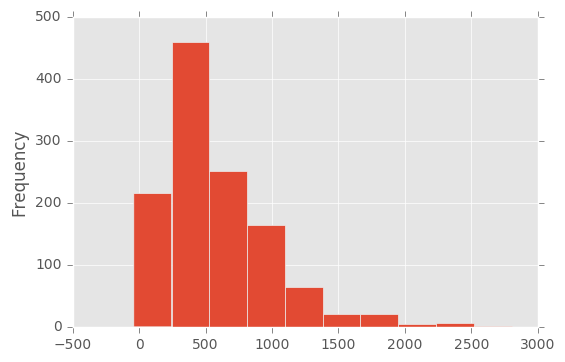

In [316]:
matches['t_first_kill'].plot(kind = 'hist')

# sen_log (Сделать разбиение по минутам!)

In [317]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
sen_cnt = {
                'id':0,
                't_sen_cnt_3':0,
                't_sen_cnt_5':0,
                't_sen_cnt_8':0,
                't_sen_cnt_10':0,
                't_sen_cnt_12':0,
                't_sen_cnt_15':0,
                't_sen_cnt_20':0,
                't_sen_cnt_25':0,
                't_sen_cnt_30':0       
                }

sen = pd.DataFrame(columns = [key for key, value in sen_cnt.items()])

for i in range(0, len(matches['sen_log'])):
    sen_cnt = {
                'id':0,
                't_sen_cnt_3':0,
                't_sen_cnt_5':0,
                't_sen_cnt_8':0,
                't_sen_cnt_10':0,
                't_sen_cnt_12':0,
                't_sen_cnt_15':0,
                't_sen_cnt_20':0,
                't_sen_cnt_25':0,
                't_sen_cnt_30':0       
                }
    try: 
        if matches['sen_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['sen_log'][i])):
                for timeStamp in timeStamps:
                    if matches['sen_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName = "t_sen_cnt_" + timeStamp
                        sen_cnt[varName] += 1
            sen_cnt['id'] = matches['id'][i]
            senRow = pd.DataFrame.from_dict(sen_cnt, orient = 'index').transpose()
            sen = sen.append(senRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

In [318]:
matches = matches.merge(sen, left_on='id', right_on='id', how='inner')
matches.shape

(1209, 97)

# obs_log (Сделать разбиение по минутам!)

In [319]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
obs_cnt = {
                'id':0,
                't_obs_cnt_3':0,
                't_obs_cnt_5':0,
                't_obs_cnt_8':0,
                't_obs_cnt_10':0,
                't_obs_cnt_12':0,
                't_obs_cnt_15':0,
                't_obs_cnt_20':0,
                't_obs_cnt_25':0,
                't_obs_cnt_30':0       
                }

obs = pd.DataFrame(columns = [key for key, value in obs_cnt.items()])

for i in range(0, len(matches['obs_log'])):
    obs_cnt = {
                'id':0,
                't_obs_cnt_3':0,
                't_obs_cnt_5':0,
                't_obs_cnt_8':0,
                't_obs_cnt_10':0,
                't_obs_cnt_12':0,
                't_obs_cnt_15':0,
                't_obs_cnt_20':0,
                't_obs_cnt_25':0,
                't_obs_cnt_30':0       
                }
    try: 
        if matches['obs_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['obs_log'][i])):
                for timeStamp in timeStamps:
                    if matches['obs_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName = "t_obs_cnt_" + timeStamp
                        obs_cnt[varName] += 1
            obs_cnt['id'] = matches['id'][i]
            obsRow = pd.DataFrame.from_dict(obs_cnt, orient = 'index').transpose()
            obs = obs.append(obsRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

In [320]:
matches = matches.merge(obs, left_on='id', right_on='id', how='inner')
print matches.shape

(1209, 106)


# runes_log (Сделать разбиение по минутам!)

In [321]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
runes_cnt = {
                'id':0,
                't_runes_cnt_3':0,
                't_runes_cnt_5':0,
                't_runes_cnt_8':0,
                't_runes_cnt_10':0,
                't_runes_cnt_12':0,
                't_runes_cnt_15':0,
                't_runes_cnt_20':0,
                't_runes_cnt_25':0,
                't_runes_cnt_30':0       
                }

runes = pd.DataFrame(columns = [key for key, value in runes_cnt.items()])

for i in range(0, len(matches['runes_log'])):
    runes_cnt = {
                'id':0,
                't_runes_cnt_3':0,
                't_runes_cnt_5':0,
                't_runes_cnt_8':0,
                't_runes_cnt_10':0,
                't_runes_cnt_12':0,
                't_runes_cnt_15':0,
                't_runes_cnt_20':0,
                't_runes_cnt_25':0,
                't_runes_cnt_30':0       
                }
    try:
        if matches['runes_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['runes_log'][i])):
                for timeStamp in timeStamps:
                    if matches['runes_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName = "t_runes_cnt_" + timeStamp
                        runes_cnt[varName] += 1
            runes_cnt['id'] = matches['id'][i]
            runesRow = pd.DataFrame.from_dict(runes_cnt, orient = 'index').transpose()
            runes = runes.append(runesRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

In [322]:
matches = matches.merge(runes, left_on='id', right_on='id', how='inner')
matches.shape  

(1209, 115)

# buyback_log

In [323]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
buyback_cnt = {
                'id':0,
                't_buyback_cnt_3':0,
                't_buyback_cnt_5':0,
                't_buyback_cnt_8':0,
                't_buyback_cnt_10':0,
                't_buyback_cnt_12':0,
                't_buyback_cnt_15':0,
                't_buyback_cnt_20':0,
                't_buyback_cnt_25':0,
                't_buyback_cnt_30':0       
                }

buyback = pd.DataFrame(columns = [key for key, value in buyback_cnt.items()])

for i in range(0, len(matches['buyback_log'])):
    buyback_cnt = {
                'id':0,
                't_buyback_cnt_3':0,
                't_buyback_cnt_5':0,
                't_buyback_cnt_8':0,
                't_buyback_cnt_10':0,
                't_buyback_cnt_12':0,
                't_buyback_cnt_15':0,
                't_buyback_cnt_20':0,
                't_buyback_cnt_25':0,
                't_buyback_cnt_30':0       
                }
    try: 
        if matches['buyback_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['buyback_log'][i])):
                for timeStamp in timeStamps:
                    varName = "t_buyback_cnt_" + timeStamp
                    if matches['buyback_log'][i][j]['time'] < int(timeStamp) * 60:                    
                        buyback_cnt[varName] += 1
            buyback_cnt['id'] = matches['id'][i]
            buybackRow = pd.DataFrame.from_dict(buyback_cnt, orient = 'index').transpose()
            buyback = buyback.append(buybackRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

In [324]:
matches = matches.merge(buyback, left_on='id', right_on='id', how='inner')
matches.shape

(1209, 124)

# Hero statistics

In [331]:
urlHeroes = "https://api.opendota.com/api/heroStats"

In [332]:
response = urllib2.urlopen(urlHeroes)
jsonResponse = response.read()
dictData = json.loads(jsonResponse)

In [333]:
heroesList = list()
heroAttr = [
            'id',
            'localized_name', 
            'attack_type',
            'pro_ban', 
            'pro_pick', 
            'pro_win', 
            'primary_attr', 
            'roles'
            ]
heroRolesList = [
                'Carry',
                'Disabler',
                'Initiator',
                'Jungler',
                'Support',
                'Durable',
                'Nuker',
                'Escape',
                'Pusher'
                ]

for heroId in range(0, len(dictData) - 1):    
    heroRaw = dict()
    
    for heroRole in heroRolesList:
        heroRaw[heroRole] = 0
    for key, value in dictData[heroId].iteritems():
#         if key == 'id':
#             matchesKey = 'hero_' + key
#             heroRaw[matchesKey] = dictData[heroId][key]
        if key in heroAttr:
            heroRaw[key] = dictData[heroId][key]
            if key == 'roles':
                for heroRole in dictData[heroId][key]:
                    heroRaw[heroRole] = 1
    del heroRaw['roles']                
    heroesList.append(heroRaw)

In [336]:
heroes = pd.DataFrame(heroesList)
print heroes.shape
heroes.head()

(112, 16)


,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support,attack_type,id,localized_name,primary_attr,pro_ban,pro_pick,pro_win
0,1,0,0,1,0,0,1,0,0,Melee,1,Anti-Mage,agi,55.0,33.0,10.0
1,0,1,1,0,1,1,0,0,0,Melee,2,Axe,str,187.0,189.0,105.0
2,0,1,1,0,0,0,1,0,1,Ranged,3,Bane,int,2.0,19.0,10.0
3,1,1,0,0,1,1,1,0,0,Melee,4,Bloodseeker,agi,7.0,16.0,6.0
4,0,1,0,0,0,1,1,0,1,Ranged,5,Crystal Maiden,int,51.0,339.0,192.0
